# Homework IV
Berk Görgülü <br>
2016702123

## 1) Finding Coin is Fair or Fake with Prior 0.5*Beta(20,3)+0.5*Beta(3,20)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

$\pi_{1}|m=fair\Rightarrow  \pi_{1}=0.5 $

$\pi_{1}|m=fake\Rightarrow  \pi_{1}=0.5* \beta(20,3)+0.5*\beta(3,20) $

Not Fake:

$P(X|m) = \int d\pi_{1}p(X|\pi_{1})\delta(\pi_{1}-0.5)$

$=\prod_{n=1}^{N}(\frac{1}{2})^{x^{(n)}}*(\frac{1}{2})^{x^{(1-n)}}=(\frac{1}{2})^{N}$

Fake:

$P(X|m) = \int d\pi_{1}*p(\pi_{1})*\prod_{n=1}^{N}p(x^{(n)}|\pi_{1})$

$=d\pi_{1}(\prod_{n=1}^{N}(1-\pi_{1})^{(1-x^{n})}*\pi_{1}^{x^{n}})*0.5(\beta(20,3)+\beta(3,20))$

$=\frac{\Gamma_(23)}{\Gamma_(20)*\Gamma_(3)}*(\frac{\Gamma_(n_{1}+20)*\Gamma_(n_{2}+3)}{\Gamma_(n_{1}+n_{2}+23}+\frac{\Gamma_(n_{1}+3)*\Gamma_(n_{2}+20)}{\Gamma_(n_{1}+n_{2}+23})$

We will evaluate using log-odds:

$l(X)=log\big(\frac{P(X|m=fair)}{P(X|m=fake)}\big)$

if $l(X)>0$, coin is fair

if $l(X)<0$, coin is fake

In [31]:
def log_odds(n1,n2):
    p0 = (0.5)**(n1+n2)
    p1 = 0.5*(gamma(23)/(gamma(20)*gamma(3)))*((gamma(n1+20)*gamma(n2+3)/gamma(n1+n2+23))+(gamma(n1+3)*gamma(n2+20)/gamma(n1+n2+23)))
    return np.log(p0)-np.log(p1)
print 'n1=3,n2=5: ', log_odds(3,5)
print 'n1=5,n2=5: ', log_odds(5,5)
print 'n1=1,n2=1: ', log_odds(1,1)
print 'n1=6,n2=1: ', log_odds(6,1)
print 'n1=1,n2=6: ', log_odds(1,6)
print 'n1=1,n2=10: ', log_odds(1,100)

n1=3,n2=5:  1.72250368685
n1=5,n2=5:  2.87844690726
n1=1,n2=1:  0.832909122935
n1=6,n2=1:  -1.13641225583
n1=1,n2=6:  -1.13641225583
n1=1,n2=10:  -60.3451398208


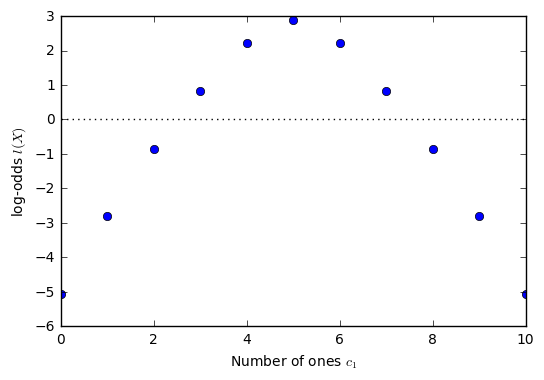

In [32]:
N = 10
l = np.zeros(N+1)
for c in range(0,N+1):
    n1 = c
    n2 = N-c
    l[c] = log_odds(n1,n2)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()



From the plot above we can say that out of 10 trials, if there are 3,4,5,6 or 7 heads, coin is more likely to be fair. However if the number of heads are smaller than 3 or larger than 7 it means that coin is more likely to be not fair.

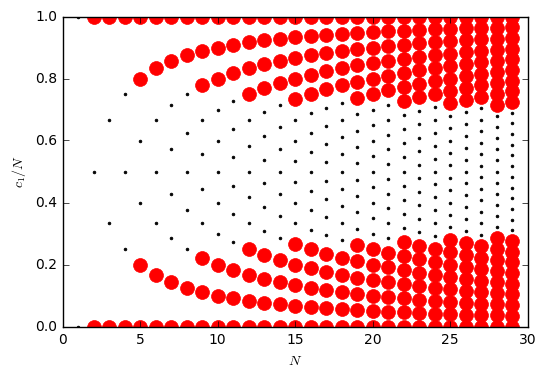

In [33]:
for N in range(1,30):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        n1 = c
        n2 = N-c
        p0 = (0.5)**(n1+n2)
        p1 = 0.5*(gamma(23)/(gamma(20)*gamma(3)))*((gamma(n1+20)*gamma(n2+3)/gamma(n1+n2+23))+(gamma(n1+3)*gamma(n2+20)/gamma(n1+n2+23)))
        l[c]=np.log(p0)-np.log(p1)

    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/float(N)
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

From the graph we can see that as the observation number increases fair region converges between 0.7 and 0.3, the non-fair region is more than 0.7 or less than 0.3.

## 2) Q.74 From Booklet

## Model

$$\pi_{1} \sim \beta(1,1)$$
<br>
$$\pi_{2} \sim \beta(1,1)$$
<br>
$$n \sim U\left\{0,50\right\}$$
<br>

Probability of change occurs in i:
<br>
$$P(n=i|X_{1:50}) = 
\dfrac{P(n=i,X_{1:50})}{P(X_{1:50})} = 
\dfrac{\int_{\pi_{1}}\int_{\pi_{2}}P(X_{1:50},\pi_{1},\pi_{2},n)*d\pi_{1}*d\pi_{2}}
    {\sum_{n}\int_{\pi_{1}}\int_{\pi_{2}}P(X_{1:50},\pi_{1},\pi_{2},n)*d\pi_{1}*d\pi_{2}}
\propto \int_{\pi_{1}}\int_{\pi_{2}}P(X_{1:50},\pi_{1},\pi_{2},n)*d\pi_{1}*d\pi_{2}$$
<br>

$$\int_{\pi_{1}}\int_{\pi_{2}}P(X_{1:50},\pi_{1},\pi_{2},n=i)*d\pi_{1}*d\pi_{2}=
\int_{\pi_{1}}\int_{\pi_{2}}P(X_{1:i-1}|\pi_{1},n=i)*P(\pi_{1})*P(X_{i:50}|\pi_{2},n=i)*P(\pi_{2})*P(n=i)*d\pi_{1}*d\pi_{2}$$
<br>

$$=P(n=i)*\dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}*\dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}
*\int_{\pi_{1}}\pi_{1}^{\alpha-1}*(1-\pi_{1})^{\beta-1}*\prod_{j=1}^{i-1}\pi_{1}^{[X_{j}==1]}*(1-\pi_{1})^{[X_{j}==0]}*d\pi_{1}
*\int_{\pi_{2}}\pi_{2}^{\alpha-1}*(1-\pi_{2})^{\beta-1}*\prod_{j=i}^{50}\pi_{2}^{[X_{j}==1]}*(1-\pi_{2})^{[X_{j}==0]}*d\pi_{2}
$$
<br>

$$=P(n=i)*\dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}
*\dfrac{\Gamma{(\beta+l_{0}^{i})}*\Gamma{(\alpha+l_{1}^{i})}}{\Gamma{(\alpha+\beta+l_{0}^{i}+l_{1}^{i})}}
*\dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}
*\dfrac{\Gamma{(\beta+r_{0}^{i})}*\Gamma{(\alpha+r_{1}^{i})}}{\Gamma{(\alpha+\beta+r_{0}^{i}+r_{1}^{i})}}$$
<br>

$$P(n=i|X_{1:50}) = \dfrac{\dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}
*\dfrac{\Gamma{(\beta+l_{0}^{i})}*\Gamma{(\alpha+l_{1}^{i})}}{\Gamma{(\alpha+\beta+l_{0}^{i}+l_{1}^{i})}}
*\dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}
*\dfrac{\Gamma{(\beta+r_{0}^{i})}*\Gamma{(\alpha+r_{1}^{i})}}{\Gamma{(\alpha+\beta+r_{0}^{i}+r_{1}^{i})}}*P(n=i)}
{\sum_{n}\bigg( \dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}
*\dfrac{\Gamma{(\beta+l_{0}^{i})}*\Gamma{(\alpha+l_{1}^{i})}}{\Gamma{(\alpha+\beta+l_{0}^{i}+l_{1}^{i})}}
*\dfrac{\Gamma{(\alpha+\beta)}}{\Gamma{(\alpha)}*\Gamma{(\beta)}}
*\dfrac{\Gamma{(\beta+r_{0}^{i})}*\Gamma{(\alpha+r_{1}^{i})}}{\Gamma{(\alpha+\beta+r_{0}^{i}+r_{1}^{i})}}*P(n=i)\bigg)}
$$
<br>

Where $r_{0}^{i}$ represents count of $0$'s at the right side of $n = i$,
<br>
$r_{1}^{i}$ represents count of $1$'s at the right side of $n = i$,
<br>
$l_{0}^{i}$ represents count of $0$'s at the left side of $n = i$,
<br>
$l_{1}^{i}$ represents number of $1$'s at the left side of $n = i$

Probability of change of coin is calculated for all of the numbers in the sequence and the maximum of the probabilities is chosen as the change point. 

In [34]:
sequence=[0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]

In [35]:
def determineChange(seq,alpha=1,beta=1):
    sequence=seq
    probs = []
    for i in range(len(sequence)):
        leftRange = range(i)
        leftCount1 = [sequence[j] for j in leftRange].count(1)
        leftCount0 = [sequence[j] for j in leftRange].count(0)
        rightRange = range(i,len(sequence))
        rightCount1 = [sequence[j] for j in rightRange].count(1)
        rightCount0 = [sequence[j] for j in rightRange].count(0)
        gl = (gamma(alpha+beta)/gamma(alpha)*gamma(beta))*((gamma(beta+leftCount0)*gamma(alpha+leftCount1))/gamma(alpha+beta+leftCount0+leftCount1))
        gr = (gamma(alpha+beta)/gamma(alpha)*gamma(beta))*((gamma(beta+rightCount0)*gamma(alpha+rightCount1))/gamma(alpha+beta+rightCount0+rightCount1))
        probs.append(gl*gr*1/len(sequence))
    probs = probs
    probs = np.multiply(probs,1/sum(probs))
    return probs.tolist().index(max(probs)),probs

print 'Assuming First index is 0:', determineChange(sequence)[0]
print 'Assuming First index is 1:', determineChange(sequence)[0]+1
print 'Probabilities:',determineChange(sequence)[1]

Assuming First index is 0: 24
Assuming First index is 1: 25
Probabilities: [  1.94555547e-05   2.61114024e-05   4.83544489e-05   1.91078064e-05
   3.23708720e-05   6.33929577e-05   2.77721529e-05   5.20727867e-05
   1.09104886e-04   2.52619775e-04   6.43032156e-04   2.27278607e-04
   5.72169919e-04   1.59390192e-03   4.93519260e-03   1.71189493e-02
   5.17884182e-03   1.87013732e-02   7.80864356e-02   2.38597442e-02
   1.09073116e-01   3.54678316e-02   1.29534689e-02   6.26084331e-02
   3.97354855e-01   1.37545911e-01   5.18288942e-02   2.10344538e-02
   9.11838392e-03   4.19445660e-03   2.03669709e-03   1.03956414e-03
   5.55916653e-04   3.10659306e-04   1.81069996e-04   1.09935354e-04
   4.27856515e-04   2.46840297e-04   1.47682229e-04   9.11937764e-04
   5.09552808e-04   2.93599475e-04   1.74490644e-04   1.07073804e-04
   6.79833678e-05   4.48296121e-05   3.09038177e-05   2.25340338e-05
   1.77819586e-05   1.60037628e-05]


### Plot

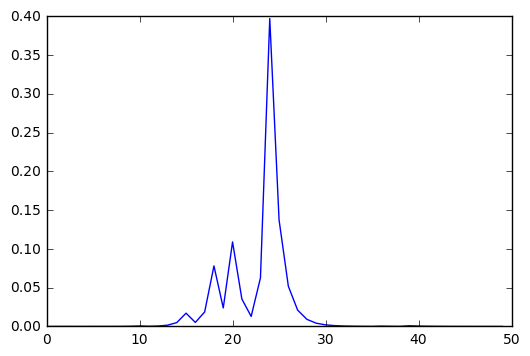

In [37]:
plt.plot(determineChange(sequence)[1])

As in the graph, we can see that there is a significant increases in the probability of change when 0 and 1's start to come mixed. And the probability makes peak at observation 24